In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data =pd.read_csv('/content/covtype.csv')
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [4]:
data['Cover_Type'].nunique()

7

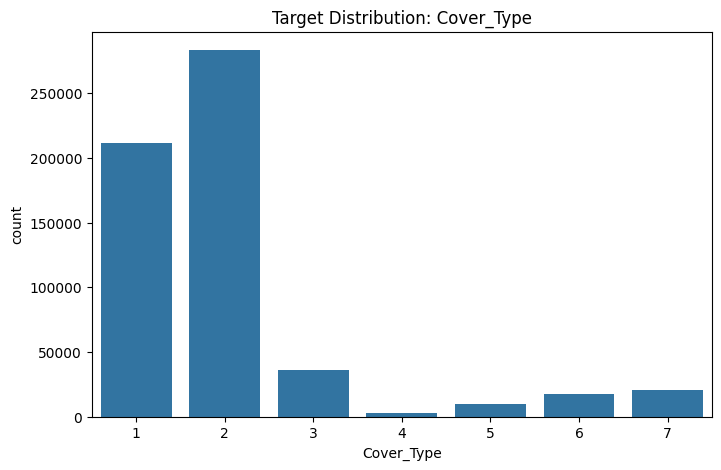

In [5]:
plt.figure(figsize=(8,5))
sns.countplot(x="Cover_Type", data=data)
plt.title("Target Distribution: Cover_Type")
plt.show()

In [6]:
data.nunique().sort_values()

,0
Wilderness_Area3,2
Wilderness_Area4,2
Soil_Type2,2
Soil_Type1,2
Wilderness_Area1,2
Wilderness_Area2,2
Soil_Type12,2
Soil_Type11,2
Soil_Type10,2
Soil_Type9,2


In [7]:
# continuous features
cont_features = [
    "Elevation", "Aspect", "Slope",
    "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways", "Horizontal_Distance_To_Fire_Points",
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm"
]

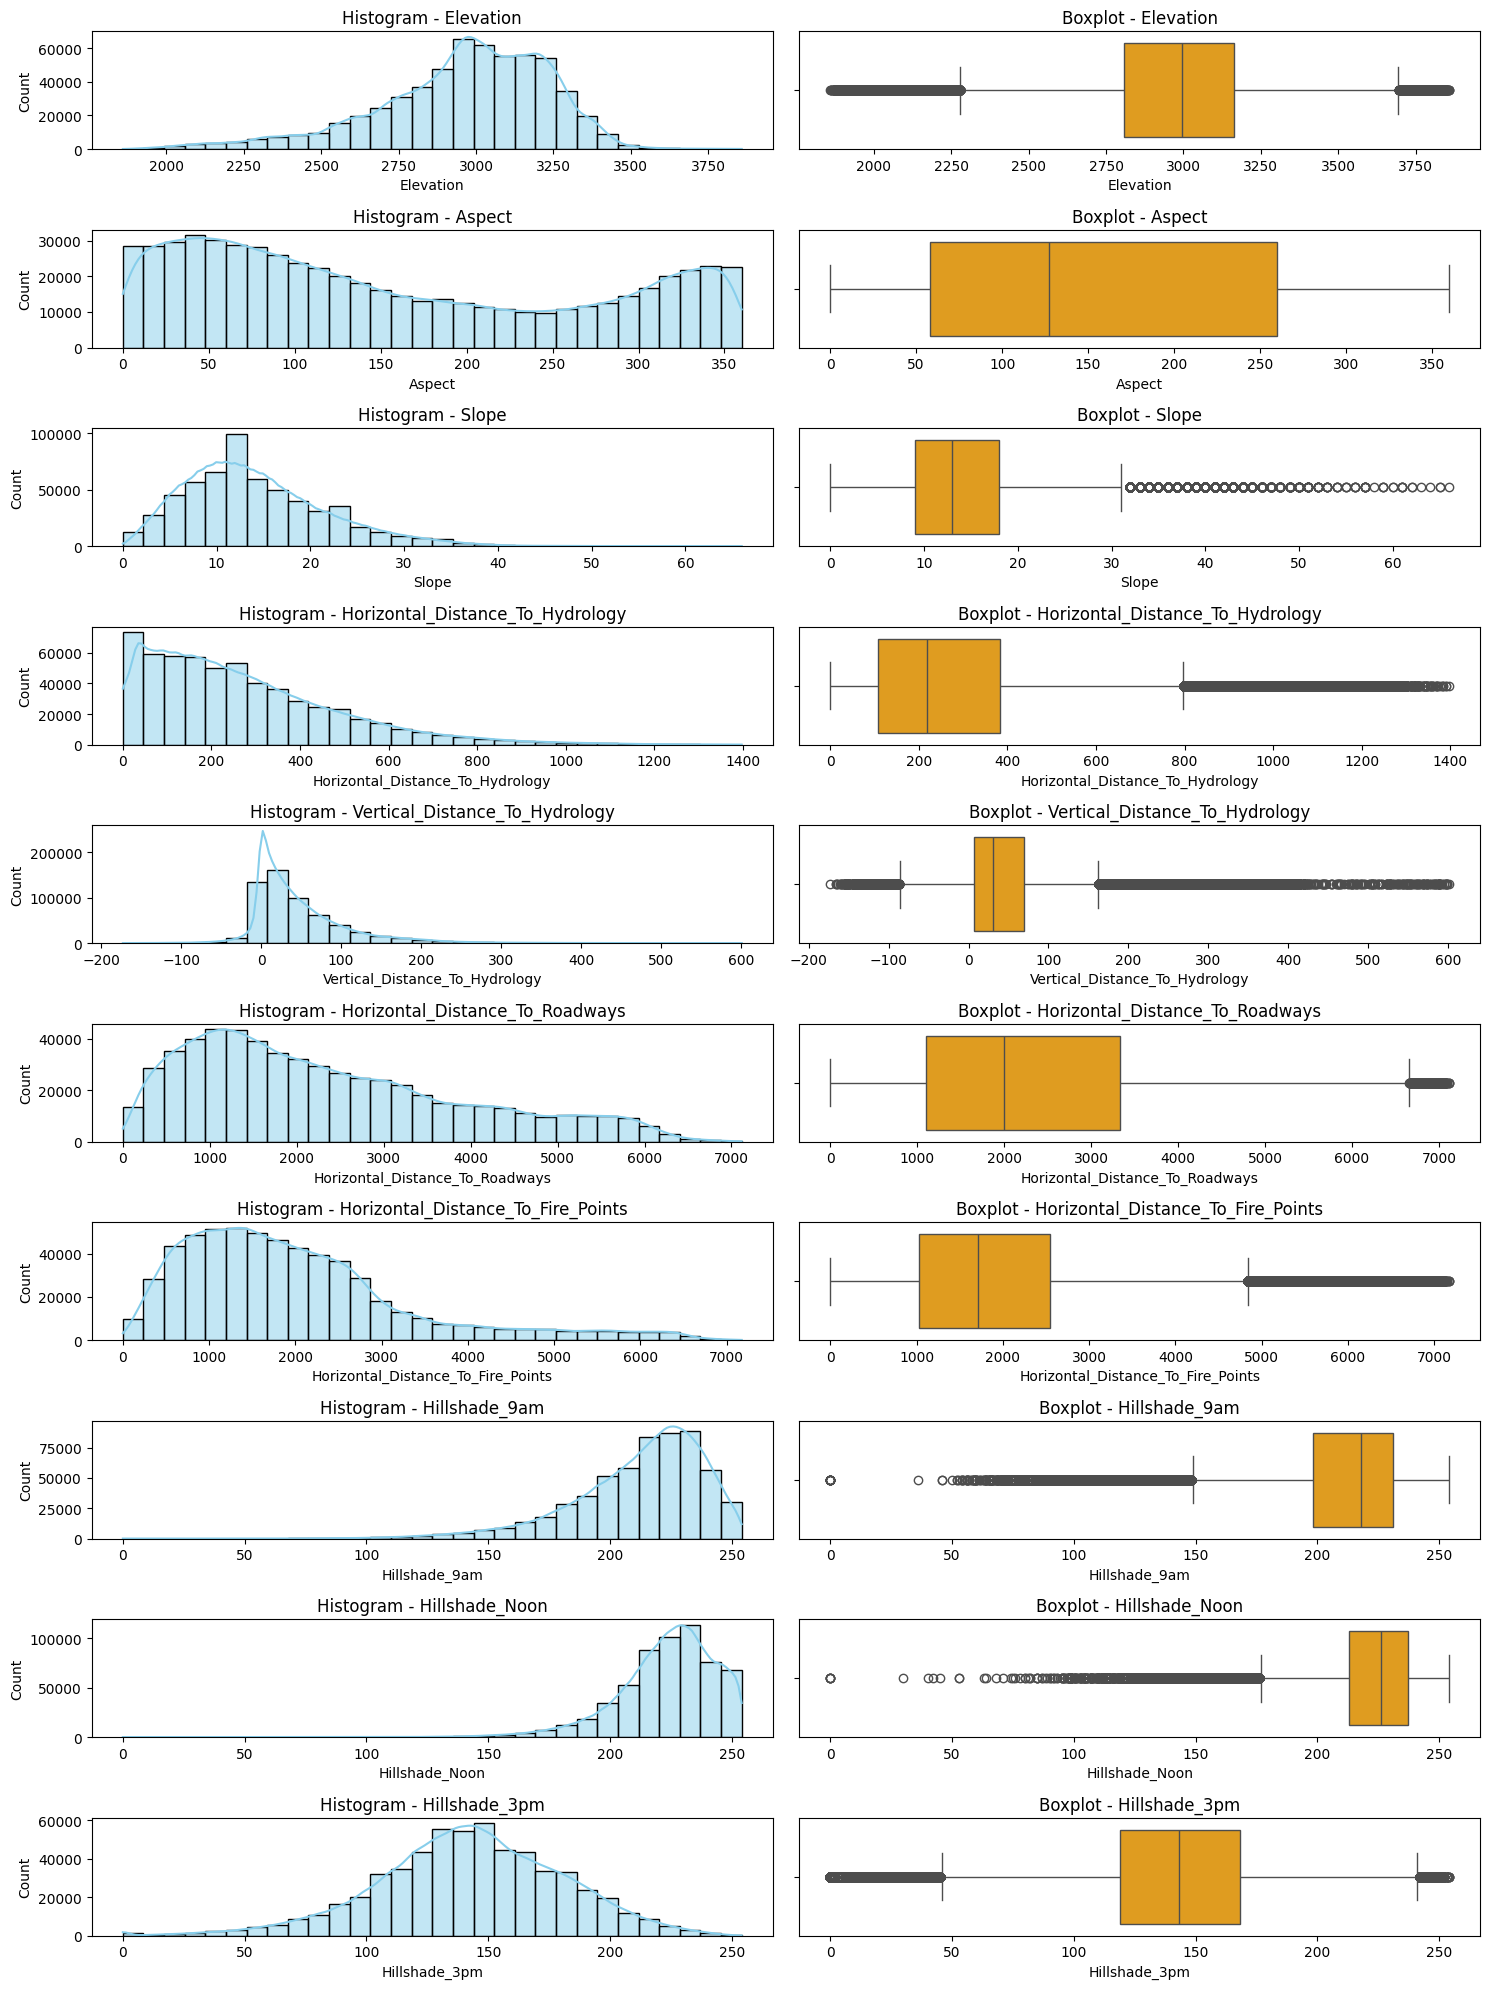

In [8]:
plt.figure(figsize=(15, 20))

for i, col in enumerate(cont_features, 1):
    # Histogram
    plt.subplot(len(cont_features), 2, 2*i-1)
    sns.histplot(data[col], bins=30, kde=True, color="skyblue")
    plt.title(f"Histogram - {col}")

    # Boxplot
    plt.subplot(len(cont_features), 2, 2*i)
    sns.boxplot(x=data[col], color="orange")
    plt.title(f"Boxplot - {col}")

plt.tight_layout()
plt.show()

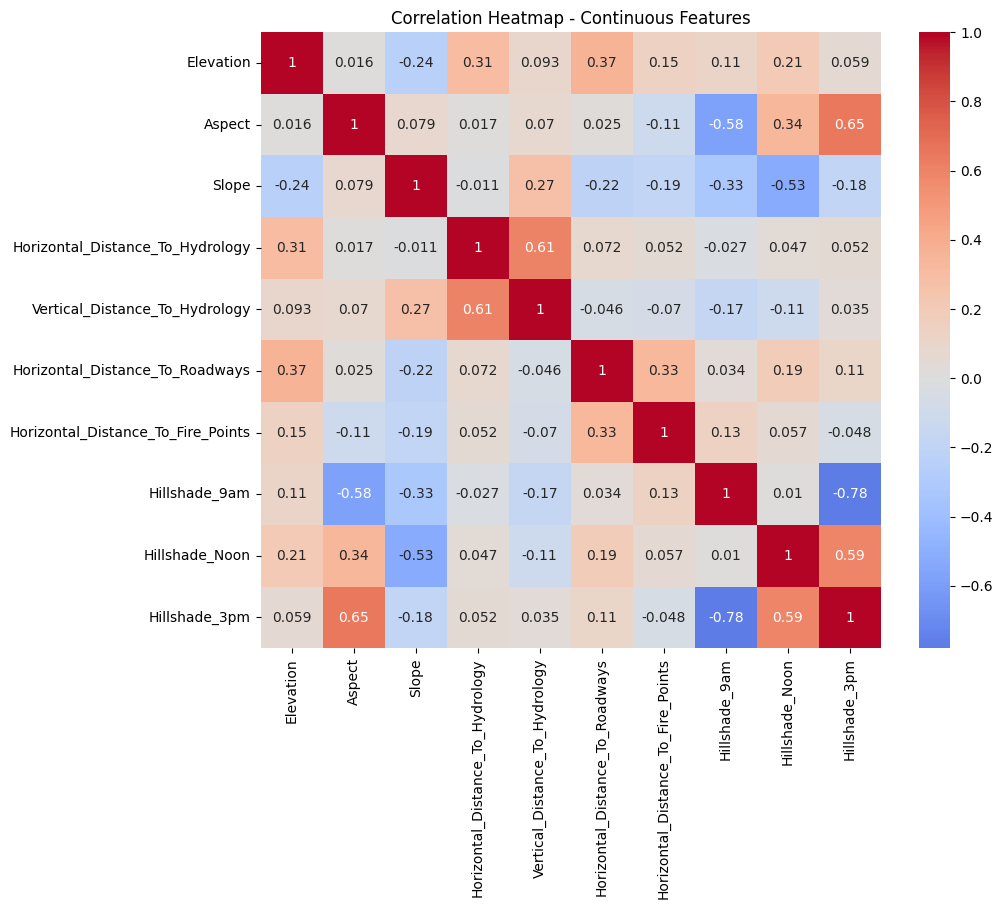

In [9]:
# Correlation heatmap for continuous features only
plt.figure(figsize=(10,8))
corr = data[cont_features].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap - Continuous Features")
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, f1_score
from xgboost import XGBClassifier

In [11]:
X =data.drop("Cover_Type", axis=1)
y =data['Cover_Type'] -1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [12]:
class_counts = y_train.value_counts().sort_index()
class_weights = {i: len(y_train) / (len(class_counts) * class_counts[i]) for i in class_counts.index}
print("Class Weights:", class_weights)

sample_weights = y_train.map(class_weights)

Class Weights: {0: np.float64(0.39181272253992233), 1: np.float64(0.29298131712974634), 2: np.float64(2.3214797648598298), 3: np.float64(30.209866112049916), 4: np.float64(8.743914368486399), 5: np.float64(4.779133850171708), 6: np.float64(4.046884794873581)}


In [13]:
model = XGBClassifier(
    objective="multi:softmax",
    num_class=len(class_counts),
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train, sample_weight=sample_weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1, num_class=7, ...)

In [14]:
y_pred = model.predict(X_test)

print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("Macro F1:", f1_score(y_test, y_pred, average="macro"))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Balanced Accuracy: 0.9091788144491341
Macro F1: 0.8009643291571614

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84     42368
           1       0.90      0.79      0.84     56661
           2       0.86      0.90      0.88      7151
           3       0.78      0.95      0.86       549
           4       0.37      0.97      0.53      1899
           5       0.67      0.92      0.78      3473
           6       0.79      0.99      0.88      4102

    accuracy                           0.83    116203
   macro avg       0.74      0.91      0.80    116203
weighted avg       0.85      0.83      0.84    116203


Confusion Matrix:
 [[35916  4951    24     0   492    42   943]
 [ 7516 44714   755     2  2622   924   128]
 [    0    28  6402   107    35   579     0]
 [    0     0    14   522     0    13     0]
 [    2    34    15     0  1839     9     0]
 [    0    17   200    34    10  3212     0]
 [   46     2     0  

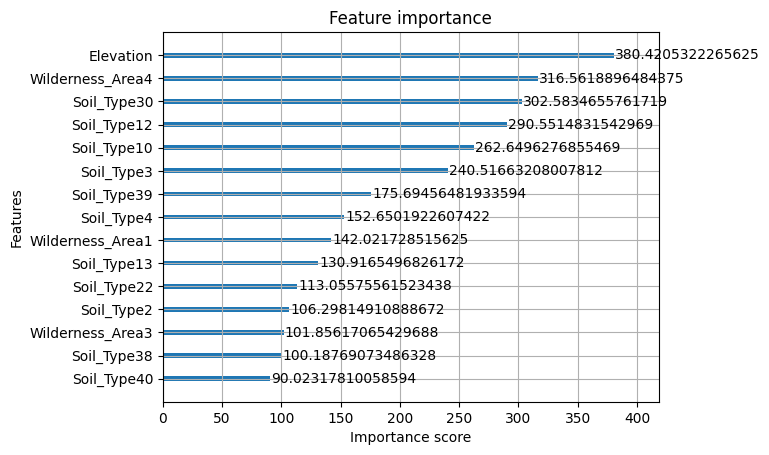

In [15]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(model, max_num_features=15, importance_type="gain")
plt.show()

In [16]:
param_dist = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20],
    "max_features": ["sqrt", None]
}

In [17]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=3,
    scoring="f1_macro",
    cv=2,
    random_state=42,
    verbose=2,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=2,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20],
                                        'max_features': ['sqrt', None],
                                        'n_estimators': [100, 200]},
                   random_state=42, scoring='f1_macro', verbose=2)

In [18]:
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 20}


In [19]:
y_pred = random_search.best_estimator_.predict(X_test)

print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("Macro F1:", f1_score(y_test, y_pred, average="macro"))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Balanced Accuracy: 0.8008607639979771
Macro F1: 0.8426730710907556

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88     42368
           1       0.87      0.94      0.90     56661
           2       0.92      0.93      0.92      7151
           3       0.91      0.83      0.87       549
           4       0.97      0.40      0.56      1899
           5       0.91      0.79      0.85      3473
           6       0.98      0.87      0.92      4102

    accuracy                           0.89    116203
   macro avg       0.92      0.80      0.84    116203
weighted avg       0.89      0.89      0.89    116203


Confusion Matrix:
 [[35942  6344     6     0     1     5    70]
 [ 3161 53232   160     1    24    71    12]
 [    0   327  6617    27     1   179     0]
 [    0     0    75   456     0    18     0]
 [   24  1097    22     0   753     3     0]
 [    3   358   338    18     1  2755     0]
 [  501    22     0  

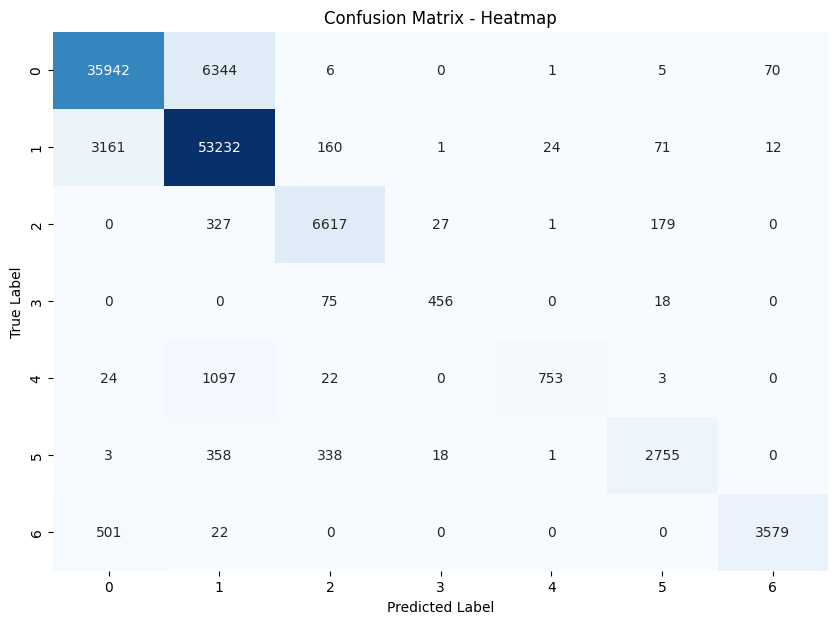

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
